## Условие 1:

### Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [92]:
import io
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
with open('kc_house_data.csv') as f:
    data = f.read()

df = pd.read_csv(io.StringIO(re.sub(r'\"{1}([^"])', r'\1', data)))

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Задача 1.2

Изучите стоимости недвижимости

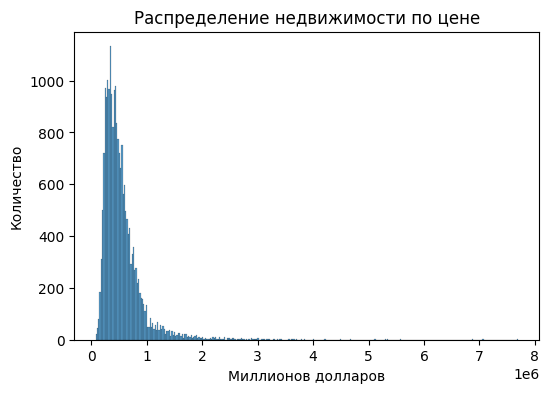

In [112]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'])

plt.title('Распределение недвижимости по цене')
plt.xlabel('Миллионов долларов')
plt.ylabel('Количество');

Вывод: Стоимость большинства объектов - менее 1 млн долларов. При этом большая часть остальных объектов стоит до 1.5 млн.

### Задача 1.3

Изучите распределение квадратуры жилой

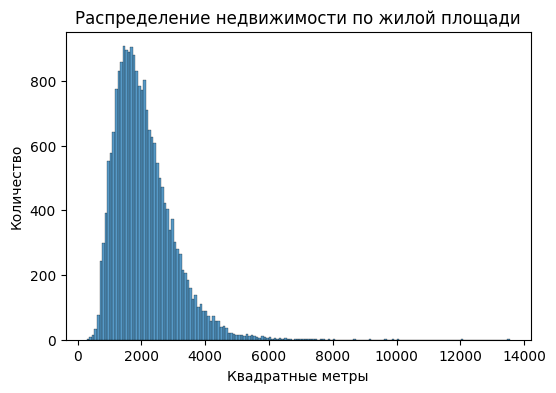

In [113]:
plt.figure(figsize=(6,4))
sns.histplot(df['sqft_living'])

plt.title('Распределение недвижимости по жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество');

Вывод: Большинство объектов в базе площадью до 3000 кв. метров.

### Задача 1.4

Изучите распределение года постройки

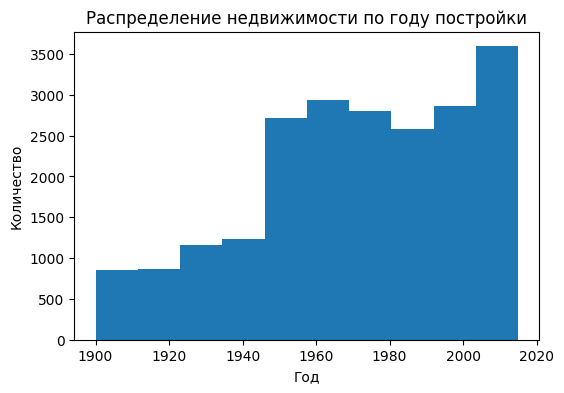

In [96]:
plt.figure(figsize=(6,4))
plt.hist(x=df['yr_built'])

plt.title('Распределение недвижимости по году постройки')
plt.xlabel('Год')
plt.ylabel('Количество');

Вывод: Большиство домов построено после 1950 года, при этом в последние годы увеличивается число новых домов.

## Условие 2:

### 2 задача

### Задача 2.1

Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

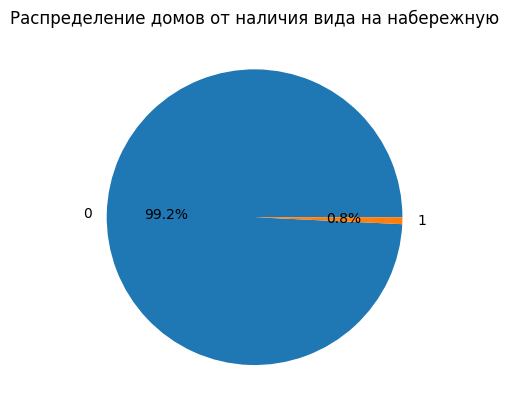

In [97]:
data = df['waterfront'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%.1f%%')
plt.title('Распределение домов от наличия вида на набережную');

Вывод: Практически нет домов с видом на набережную (либо набережная очень мала, либо на ней нельзя строить жилые дома)

### Задача 2.2

Изучите распределение этажей домов

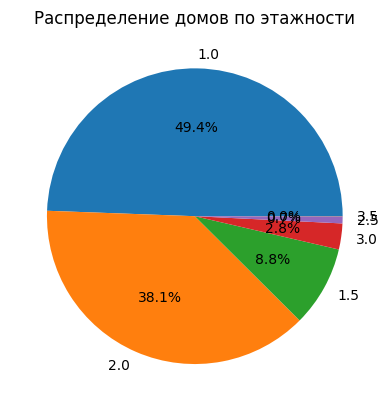

In [98]:
data = df['floors'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%.1f%%')
plt.title('Распределение домов по этажности');

Вывод: Преобладает малоэтажное строительство, 1-2 этажа составляет 87,5% всей недвижимости

### Задача 2.3

Изучите распределение состояния домов

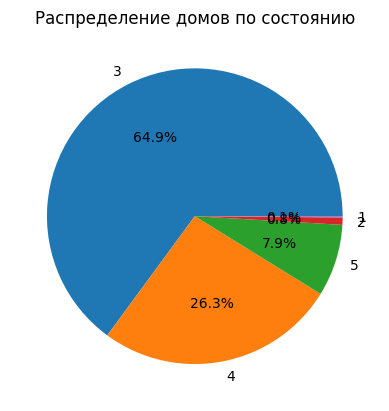

In [99]:
data = df['condition'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%.1f%%')
plt.title('Распределение домов по состоянию');

Вывод: Большинство объектов в хорошем или отличном состоянии от 3 до 5, плохих крайне мало

## Условие 3:

### 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

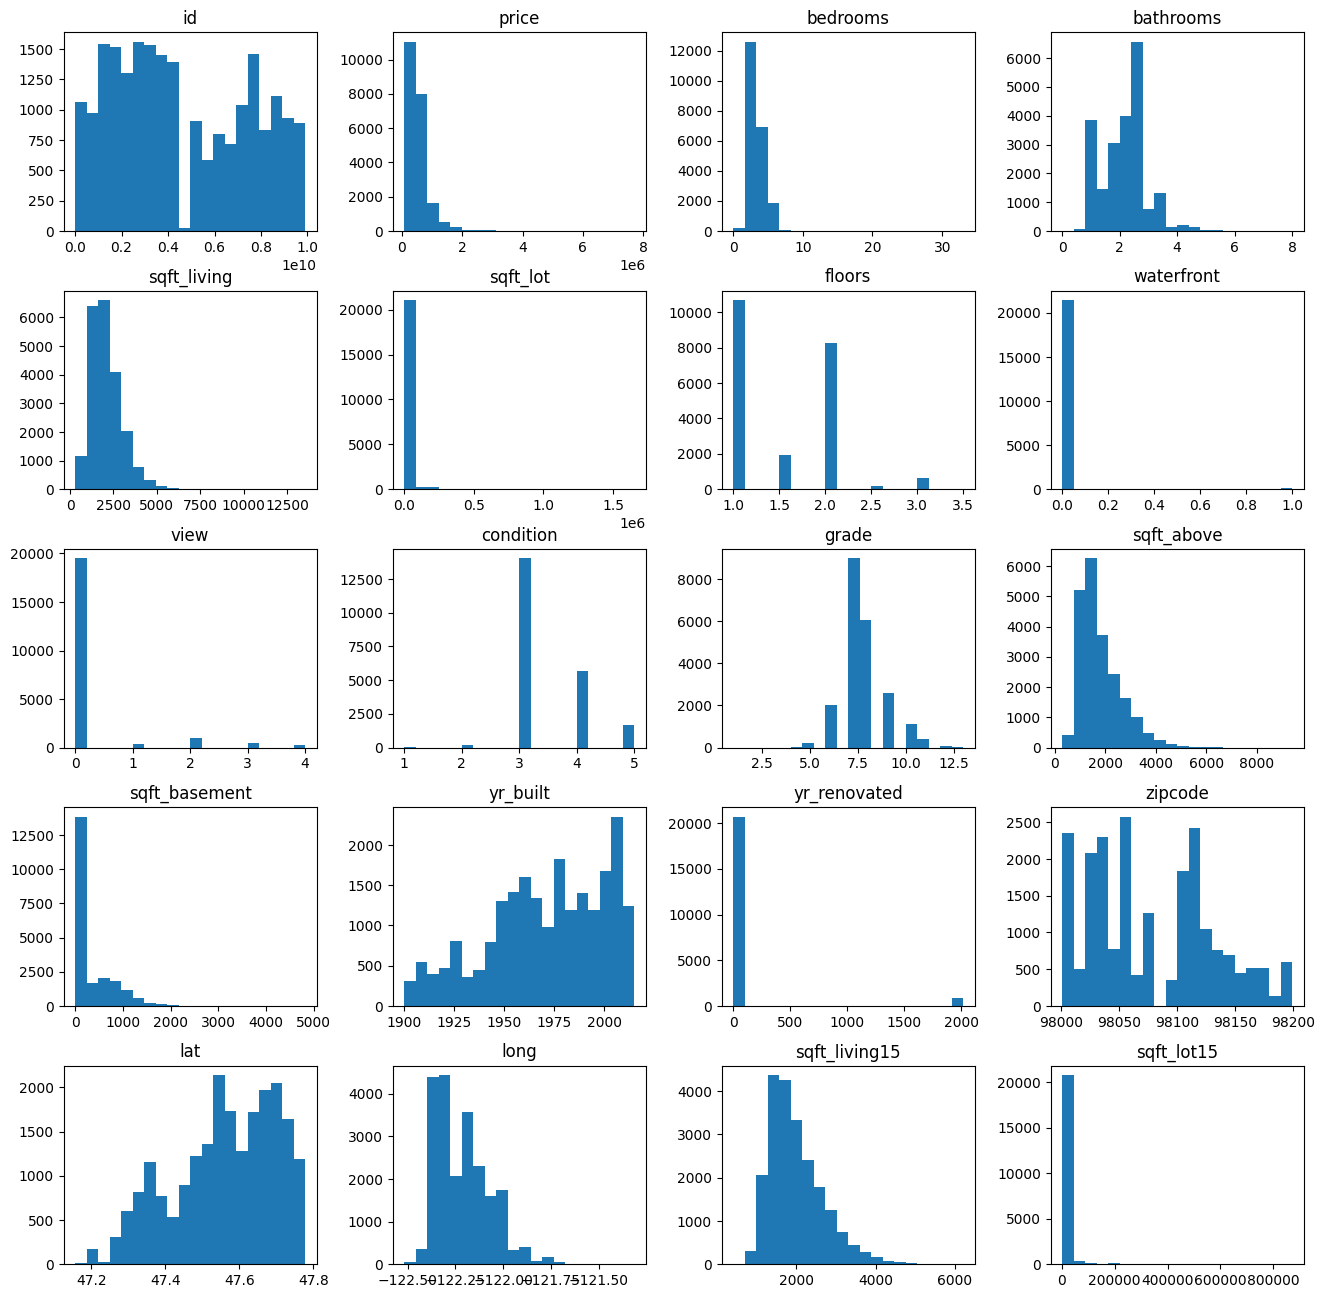

In [115]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

<Figure size 1000x600 with 0 Axes>

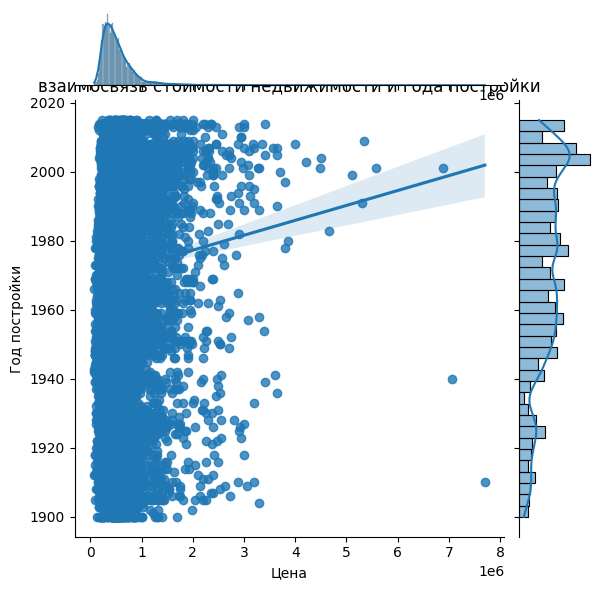

In [120]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg')
plt.title('взаимосвязь стоимости недвижимости и года постройки')
plt.xlabel('Цена')
plt.ylabel('Год постройки');

Есть зависимость цены от года постройки дома. Но она довольно слабая.

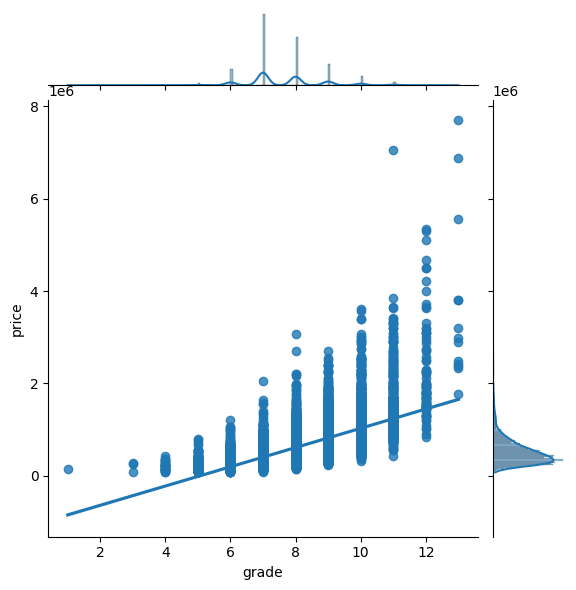

In [124]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

Есть сильная зависимость цены от состояния дома.

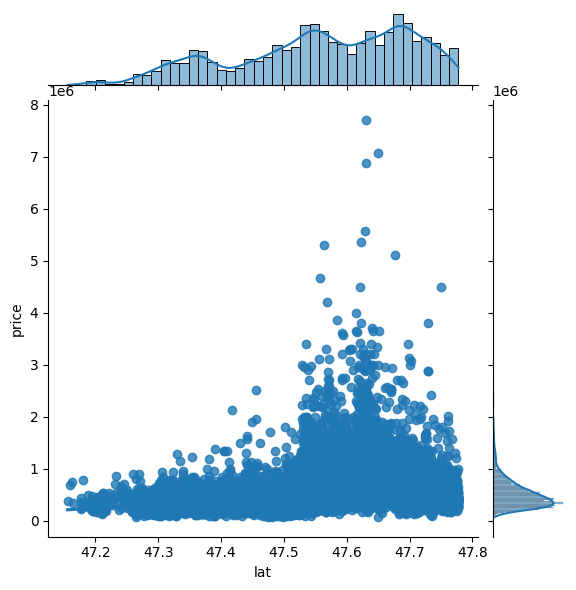

In [126]:
sns.jointplot(x=df['lat'], y=df['price'], kind='reg');

С севера на юг дома дорожают.

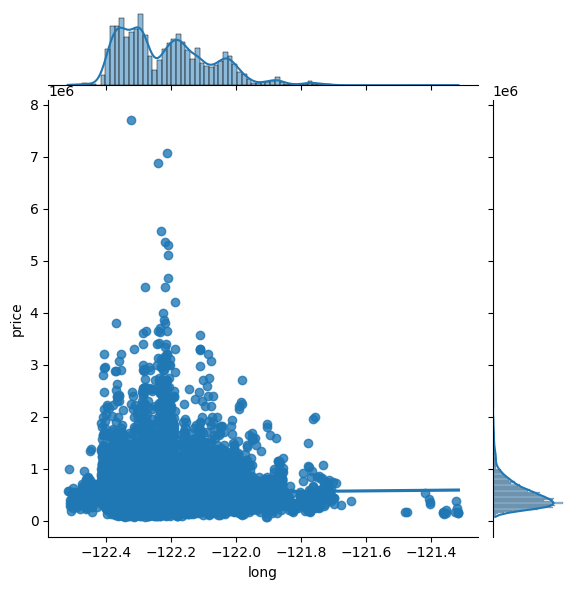

In [127]:
sns.jointplot(x=df['long'], y=df['price'], kind='reg');

В западной части дома дороже, чем в восточной.